# November ??th, 2021 (register N162)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(256, 0, 100), full_load=True, load_parcel=True, load_allen=True)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
# mice.parcel.fit_parcel(True)

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

num regions,    left: 768,  right: 768
region id diff,         r - l:  Counter({768: 768})

[PROGRESS] fit columnar: done

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] save results: done.

In [3]:
from register.register import *
reg = Register(mice)

In [32]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.15, 0.20, 0.25, 0.28, 0.3, 0.31, 0.32, 0.34, 0.35, 0.37, 0.38, 0.39, 0.40, 0.5, 0.9],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [
        0.15,
        0.2,
        0.25,
        0.28,
        0.3,
        0.31,
        0.32,
        0.34,
        0.35,
        0.37,
        0.38,
        0.39,
        0.4,
        0.5,
        0.9
    ],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [33]:
reg.set_mode('bold')
reg.mi_base = None

In [34]:
key = 'sub-SLC03_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)

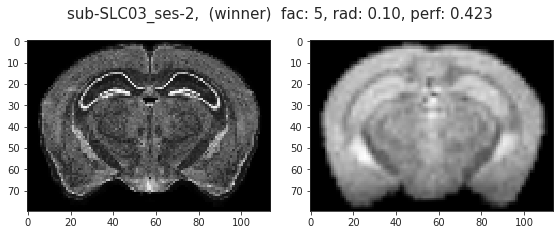

In [ ]:
results = reg.fit_register(
    name=key,
    moving=indiv,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [ ]:
save_obj(results['df'], f"fit_{key}_{now()}", tmp_dir, 'df')

### --- continue from here

In [30]:
df = results['df'].copy()

params = {
    'seed': 4,
    'type': 'ElasticSyN',
    'grad': 0.32,
    'syn_bin': 64,
    'aff_bin': 32,
    'aff_rate': 0.6,
}
cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)

df_sub_main = df.loc[cond]
df_sub_main

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
126306,4,ElasticSyN,0.32,64,32,0.6,mi,0.517971
126307,4,ElasticSyN,0.32,64,32,0.6,ovp_MOp,0.994470
126308,4,ElasticSyN,0.32,64,32,0.6,sym_MOp,0.923759
126309,4,ElasticSyN,0.32,64,32,0.6,ovp_MOs,0.999133
126310,4,ElasticSyN,0.32,64,32,0.6,sym_MOs,0.947635
126311,4,ElasticSyN,0.32,64,32,0.6,ovp_SS,1.000000
126312,4,ElasticSyN,0.32,64,32,0.6,sym_SS,0.979114
126313,4,ElasticSyN,0.32,64,32,0.6,ovp_VISC,0.990654
126314,4,ElasticSyN,0.32,64,32,0.6,sym_VISC,0.963303
126315,4,ElasticSyN,0.32,64,32,0.6,ovp_VIS,1.000000


In [23]:
results['perf']

0.954151807074375

In [24]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
11689,0,ElasticSyN,0.3,64,13,0.2,sym,0.958306


In [25]:
params = dict(_df.iloc[_df['score'].argmax()])
params.pop('metric')
params.pop('score')

cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df_sub = df.loc[cond]
df_sub

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
11664,0,ElasticSyN,0.3,64,13,0.2,mi,0.516488
11665,0,ElasticSyN,0.3,64,13,0.2,ovp_MOp,0.993421
11666,0,ElasticSyN,0.3,64,13,0.2,sym_MOp,0.941606
11667,0,ElasticSyN,0.3,64,13,0.2,ovp_MOs,1.000000
11668,0,ElasticSyN,0.3,64,13,0.2,sym_MOs,0.877375
11669,0,ElasticSyN,0.3,64,13,0.2,ovp_SS,0.999684
11670,0,ElasticSyN,0.3,64,13,0.2,sym_SS,0.996845
11671,0,ElasticSyN,0.3,64,13,0.2,ovp_VISC,0.991071
11672,0,ElasticSyN,0.3,64,13,0.2,sym_VISC,0.947826
11673,0,ElasticSyN,0.3,64,13,0.2,ovp_VIS,1.000000


[<matplotlib.lines.Line2D object at 0x7f6f58612640>]

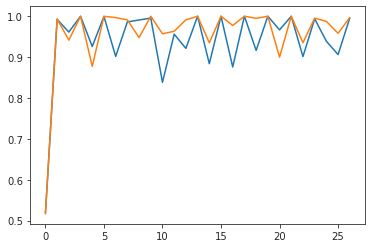

In [26]:
plt.plot(df_sub_main['score'].values)
plt.plot(df_sub['score'].values)

<AxesSubplot:xlabel='score', ylabel='Count'>

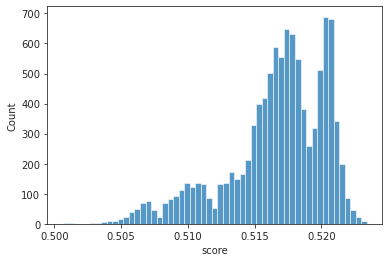

In [27]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

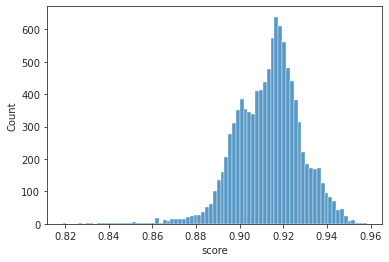

In [28]:
sns.histplot(df.loc[df['metric'] == 'sym', 'score'])

<AxesSubplot:>

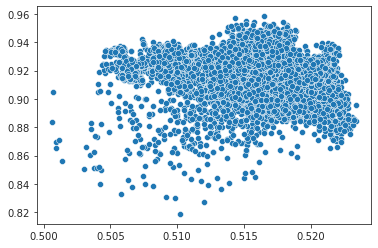

In [29]:
sns.scatterplot(
    x=df.loc[df['metric'] == 'mi', 'score'].values,
    y=df.loc[df['metric'] == 'sym', 'score'].values,
)

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)